In [1]:
# import library
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd 
import matplotlib.pyplot as plt
from umap import UMAP
import xgboost as xgb
import lightgbm as lgb
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA, FastICA, KernelPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

In [2]:
# load each HCD Data
with open('../../data/HCD35_pos.pickle', mode='rb') as fp:
    df_3 = pickle.load(fp)
    
with open('../../data/HCD45_pos.pickle', mode='rb') as fp:
    df_4 = pickle.load(fp)

with open('../../data/HCD65_pos.pickle', mode='rb') as fp:
    df_6 = pickle.load(fp)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f953b66b5f8>]],
      dtype=object)

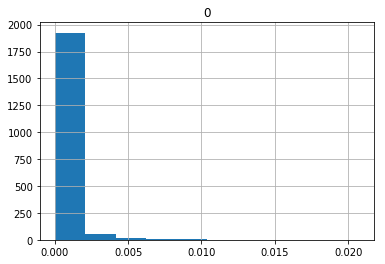

In [3]:
# divide objective and features
objective = df_3.Subclass
le = preprocessing.LabelEncoder()
objective = le.fit_transform(objective)
features = df_3.drop('Subclass', axis=1)

# train test split
random_state = np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(
    features,
    objective,
    test_size=0.2
)

# define and fit
clf = rf()
clf.fit(X_train, y_train)
t = clf.feature_importances_

g = pd.DataFrame(t, index=df_3.drop('Subclass', axis=1).columns).sort_values(0, ascending=False)
g[g[0] > 0].hist()

# over 0.001 is better

In [4]:
t = (g[g[0] > 0.0002]).index

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9520087748>]],
      dtype=object)

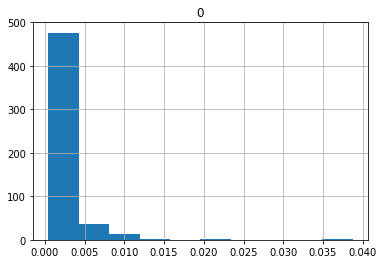

In [5]:
# set parameters
params = {}
params['device'] = 'gpu'
params['gpu_id'] = 1
params['updater'] = 'grow_gpu_hist'

model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

g = pd.DataFrame(
    model.feature_importances_, 
    index=df_3.drop('Subclass', axis=1).columns
).sort_values(0, ascending=False)

g[g[0] > 0].hist()

# over 0.001 is better

In [6]:
c = (g[g[0] > 0.0001].index)

In [7]:
m = df_3[list(set(list(t)+list(c)))]

In [8]:
m.head()

,HCD35_163.08,HCD35_212.03,HCD35_227.18,HCD35_361.84,HCD35_193.09,HCD35_551.36,HCD35_203.18,HCD35_317.32,HCD35_593.37,HCD35_352.21,...,HCD35_231.07,HCD35_467.16,HCD35_81.07,HCD35_169.1,HCD35_376.22,HCD35_146.05,HCD35_419.12,HCD35_227.94,HCD35_441.86,HCD35_319.14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,66056.140625,0.0,0.0,167651.453125,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,143027.140625,0.0,0.0,189353.328125,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,77371.257812,0.0,0.0,165472.406250,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,118932.695312,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f951d7f9cc0>]],
      dtype=object)

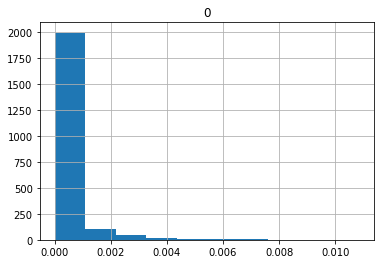

In [9]:
# divide objective and features
objective = df_4.Subclass
le = preprocessing.LabelEncoder()
objective = le.fit_transform(objective)
features = df_4.drop('Subclass', axis=1)

# train test split
random_state = np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(
    features,
    objective,
    test_size=0.2
)

# define and fit
clf = rf()
clf.fit(X_train, y_train)
c = clf.feature_importances_

g = pd.DataFrame(c, index=df_4.drop('Subclass', axis=1).columns).sort_values(0, ascending=False)
g[g[0] > 0].hist()

# over 0.001 is better

In [10]:
b = (g[g[0] > 0.0002].index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f953b5ee8d0>]],
      dtype=object)

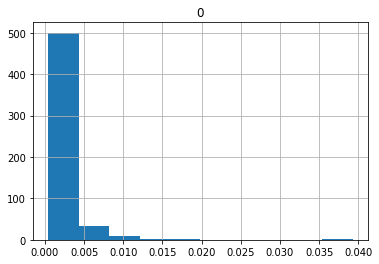

In [11]:
# set parameters
params = {}
params['device'] = 'gpu'
params['gpu_id'] = 1
params['updater'] = 'grow_gpu_hist'

model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

g = pd.DataFrame(
    model.feature_importances_, 
    index=df_4.drop('Subclass', axis=1).columns
).sort_values(0, ascending=False)

g[g[0] > 0].hist()

# over 0.001 is better

In [12]:
o = (g[g[0] > 0.0001].index)

In [13]:
l = df_4[list(set(list(o)+list(b)))]

In [14]:
l.shape

(1676, 1409)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f953b50cdd8>]],
      dtype=object)

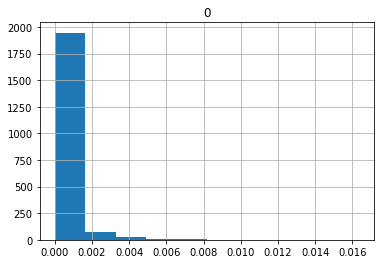

In [15]:
# divide objective and features
objective = df_6.Subclass
le = preprocessing.LabelEncoder()
objective = le.fit_transform(objective)
features = df_6.drop('Subclass', axis=1)

# train test split
random_state = np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(
    features,
    objective,
    test_size=0.2
)

# define and fit
clf = rf()
clf.fit(X_train, y_train)
g = clf.feature_importances_

f = pd.DataFrame(g, index=df_6.drop('Subclass', axis=1).columns).sort_values(0, ascending=False)
f[f[0] > 0].hist()

In [16]:
p = (f[f[0] > 0.0002].index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95453101d0>]],
      dtype=object)

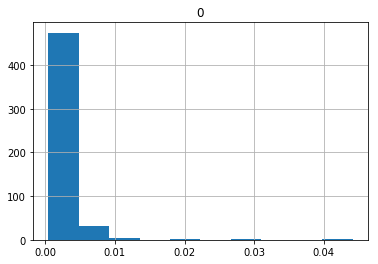

In [17]:
# set parameters
params = {}
params['device'] = 'gpu'
params['gpu_id'] = 1
params['updater'] = 'grow_gpu_hist'

model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

g = pd.DataFrame(
    model.feature_importances_, 
    index=df_6.drop('Subclass', axis=1).columns
).sort_values(0, ascending=False)

g[g[0] > 0].hist()

# over 0.002 is better

In [18]:
j = (g[g[0] > 0.0001].index)

In [19]:
v = df_6[list(set(list(p)+list(j)))]

In [20]:
v.shape

(1676, 1331)

In [21]:
s = pd.concat([df_3.Subclass,m, l, v], axis=1)
s.to_csv('../../data/feature_selection_positive.csv')

In [22]:
s.shape

(1676, 4105)

In [24]:
# load each HCD Data
with open('../../data/HCD35_neg.pickle', mode='rb') as fp:
    df_3 = pickle.load(fp)
    
with open('../../data/HCD45_neg.pickle', mode='rb') as fp:
    df_4 = pickle.load(fp)

with open('../../data/HCD65_neg.pickle', mode='rb') as fp:
    df_6 = pickle.load(fp)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9588e2fd30>]],
      dtype=object)

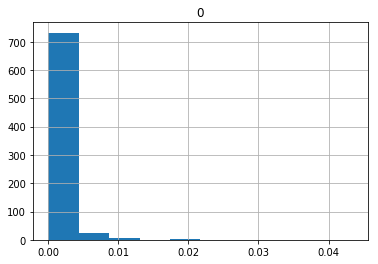

In [25]:
# divide objective and features
objective = df_3.Subclass
le = preprocessing.LabelEncoder()
objective = le.fit_transform(objective)
features = df_3.drop('Subclass', axis=1)

# train test split
random_state = np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(
    features,
    objective,
    test_size=0.2
)

# define and fit
clf = rf()
clf.fit(X_train, y_train)

g = clf.feature_importances_

f = pd.DataFrame(g, index=df_3.drop('Subclass', axis=1).columns).sort_values(0, ascending=False)
f[f[0] > 0].hist()

In [26]:
r = (f[f[0] > 0.000001].index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9588e144e0>]],
      dtype=object)

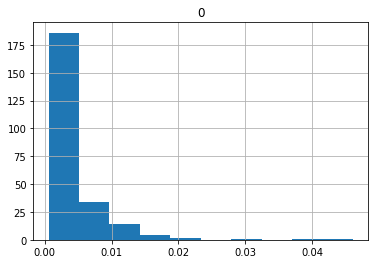

In [27]:
# set parameters
params = {}
params['device'] = 'gpu'
params['gpu_id'] = 1
params['updater'] = 'grow_gpu_hist'

model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

g = pd.DataFrame(
    model.feature_importances_, 
    index=df_3.drop('Subclass', axis=1).columns
).sort_values(0, ascending=False)

g[g[0] > 0].hist()

# over 0.001 is better

In [28]:
d = ((g[g[0] > 0.0005]).index)

In [29]:
y = df_3[list(set(list(d)+list(r)))]

In [30]:
y.shape

(467, 857)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9588525518>]],
      dtype=object)

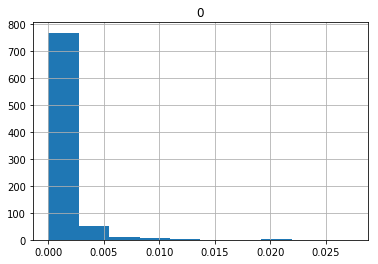

In [31]:
# divide objective and features
objective = df_4.Subclass
le = preprocessing.LabelEncoder()
objective = le.fit_transform(objective)
features = df_4.drop('Subclass', axis=1)

# train test split
random_state = np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(
    features,
    objective,
    test_size=0.2
)

# define and fit
clf = rf()
clf.fit(X_train, y_train)

g = clf.feature_importances_

f = pd.DataFrame(g, index=df_4.drop('Subclass', axis=1).columns).sort_values(0, ascending=False)
f[f[0] > 0].hist()

In [32]:
n = ((f[f[0] > 0.00001]).index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f953b1960f0>]],
      dtype=object)

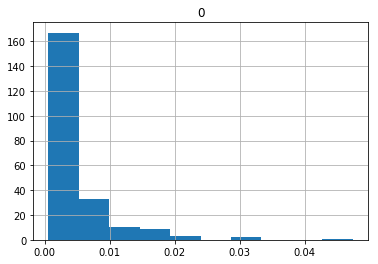

In [33]:
# set parameters
params = {}
params['device'] = 'gpu'
params['gpu_id'] = 1
params['updater'] = 'grow_gpu_hist'

model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

g = pd.DataFrame(
    model.feature_importances_, 
    index=df_4.drop('Subclass', axis=1).columns
).sort_values(0, ascending=False)

g[g[0] > 0].hist()

# over 0.001 is better

In [34]:
e = (g[g[0] > 0.0001].index)

In [35]:
h = df_4[list(set(list(e)+list(n)))]

In [36]:
h.shape

(467, 877)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f953b0ae978>]],
      dtype=object)

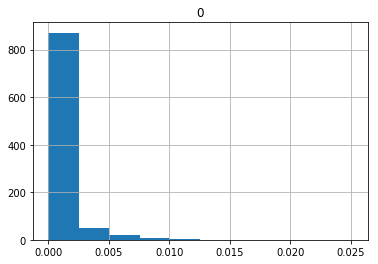

In [37]:
# divide objective and features
objective = df_6.Subclass
le = preprocessing.LabelEncoder()
objective = le.fit_transform(objective)
features = df_6.drop('Subclass', axis=1)

# train test split
random_state = np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(
    features,
    objective,
    test_size=0.2
)

# define and fit
clf = rf()
clf.fit(X_train, y_train)

g = clf.feature_importances_

f = pd.DataFrame(g, index=df_6.drop('Subclass', axis=1).columns).sort_values(0, ascending=False)
f[f[0] > 0].hist()

In [38]:
w = ((f[f[0] > 0.000001]).index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f953b85a2b0>]],
      dtype=object)

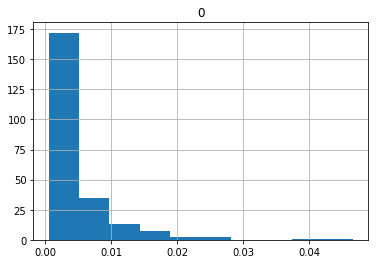

In [39]:
# set parameters
params = {}
params['device'] = 'gpu'
params['gpu_id'] = 1
params['updater'] = 'grow_gpu_hist'

model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

g = pd.DataFrame(
    model.feature_importances_, 
    index=df_6.drop('Subclass', axis=1).columns
).sort_values(0, ascending=False)

g[g[0] > 0].hist()

# over 0.001 is better

In [40]:
q = ((g[g[0] > 0.0001]).index)

In [41]:
r = df_6[list(set(list(w)+list(q)))]

In [42]:
b = pd.concat([
    df_3.Subclass,
    y, 
    h, 
    r
], axis=1)


In [43]:
b.shape

(467, 2766)

In [44]:
b.to_csv('../../data/feature_selection_negative.csv')